In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

The Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print (cancer["DESCR"])
print (cancer["target_names"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# (Optional) Inspect dataset description and target names
# print(cancer['DESCR'])
# print(cancer['target_names'])

# Add target column
df['target'] = cancer['target']

# Preview the data
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Visualisation

In [8]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)


In [9]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [11]:
x_pca = pca.transform(scaled_data)

print(scaled_data.shape)  # (n_samples, n_features) before PCA
print(x_pca.shape)        # (n_samples, n_components) after PCA


(569, 31)
(569, 2)


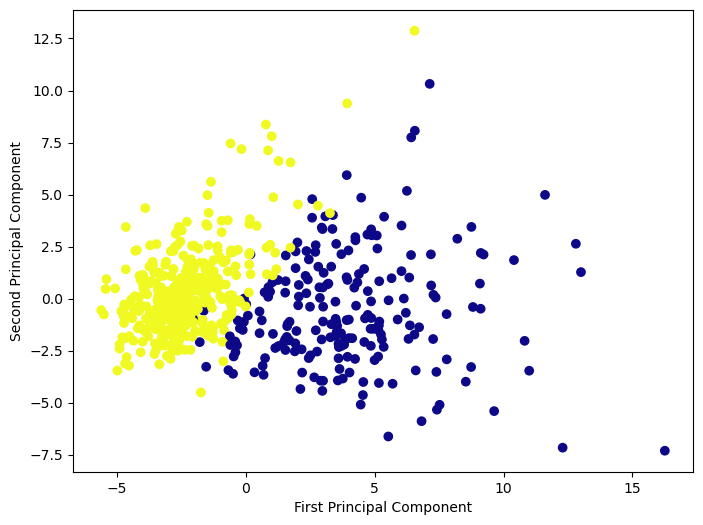

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


Interpreting the Components

In [14]:
pca.components_

array([[ 0.21639914,  0.10359936,  0.2245478 ,  0.21796464,  0.13764549,
         0.23150388,  0.25122179,  0.2552664 ,  0.1330126 ,  0.05797189,
         0.20090409,  0.01547414,  0.20563036,  0.19798194,  0.01123624,
         0.1619218 ,  0.14578435,  0.1762679 ,  0.03832541,  0.09508414,
         0.22558983,  0.10501867,  0.23364163,  0.22196962,  0.12530106,
         0.20447639,  0.22307483,  0.24628844,  0.12066328,  0.12672101,
        -0.21691695],
       [-0.22654473, -0.05826196, -0.20762951, -0.22322434,  0.18876038,
         0.15847307,  0.06786768, -0.02722028,  0.19321967,  0.36761956,
        -0.09715581,  0.09118826, -0.08069084, -0.14355563,  0.20531469,
         0.23886735,  0.203226  ,  0.13704859,  0.1860032 ,  0.28433173,
        -0.21289639, -0.04513536, -0.19259202, -0.21188718,  0.17247591,
         0.14766283,  0.10308807, -0.00243309,  0.14206245,  0.27644912,
         0.07760994]])

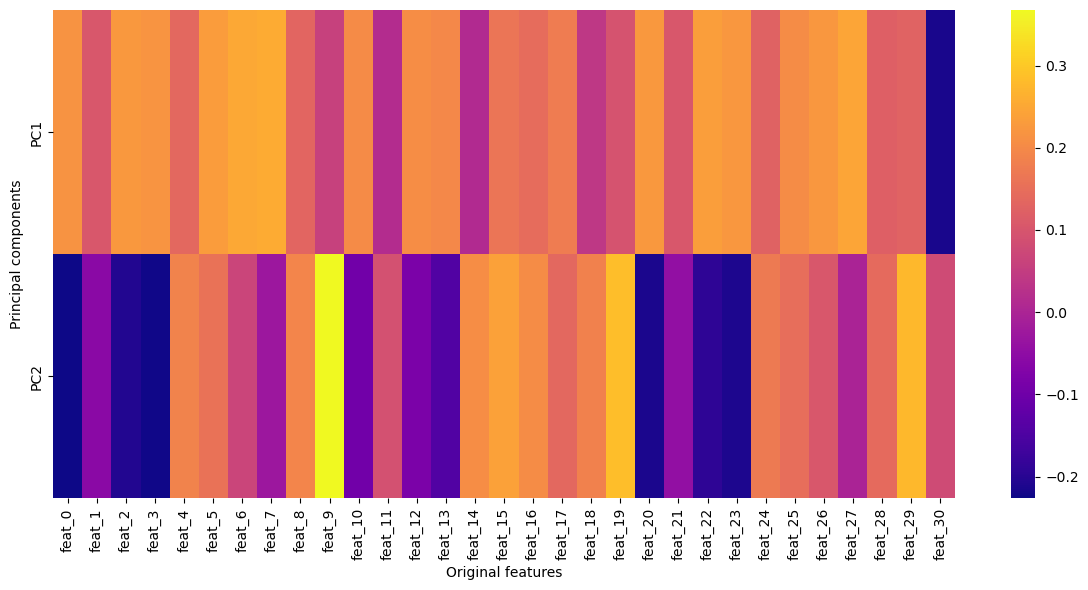

In [17]:
# If you fit PCA on a pandas DataFrame (recommended)
# e.g., scaled_df = pd.DataFrame(scaled_data, columns=some_feature_list)
feature_names = scaled_df.columns if 'scaled_df' in globals() else cancer['feature_names']

# Fallback in case lengths still don't match (e.g., you selected a subset)
if len(feature_names) != getattr(pca, "n_features_in_", pca.components_.shape[1]):
    feature_names = [f"feat_{i}" for i in range(pca.components_.shape[1])]

df_comp = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=[f"PC{i+1}" for i in range(pca.components_.shape[0])]
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap='plasma')
plt.xlabel("Original features")
plt.ylabel("Principal components")
plt.tight_layout()
plt.show()
